<a href="https://colab.research.google.com/github/tharindatj/Kaggle_competitions/blob/submission---2/kaggle_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the start off modules and load the data

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('train.csv')
df.set_index('Id', inplace=True)

Initial Scan of Data

In [88]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [89]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

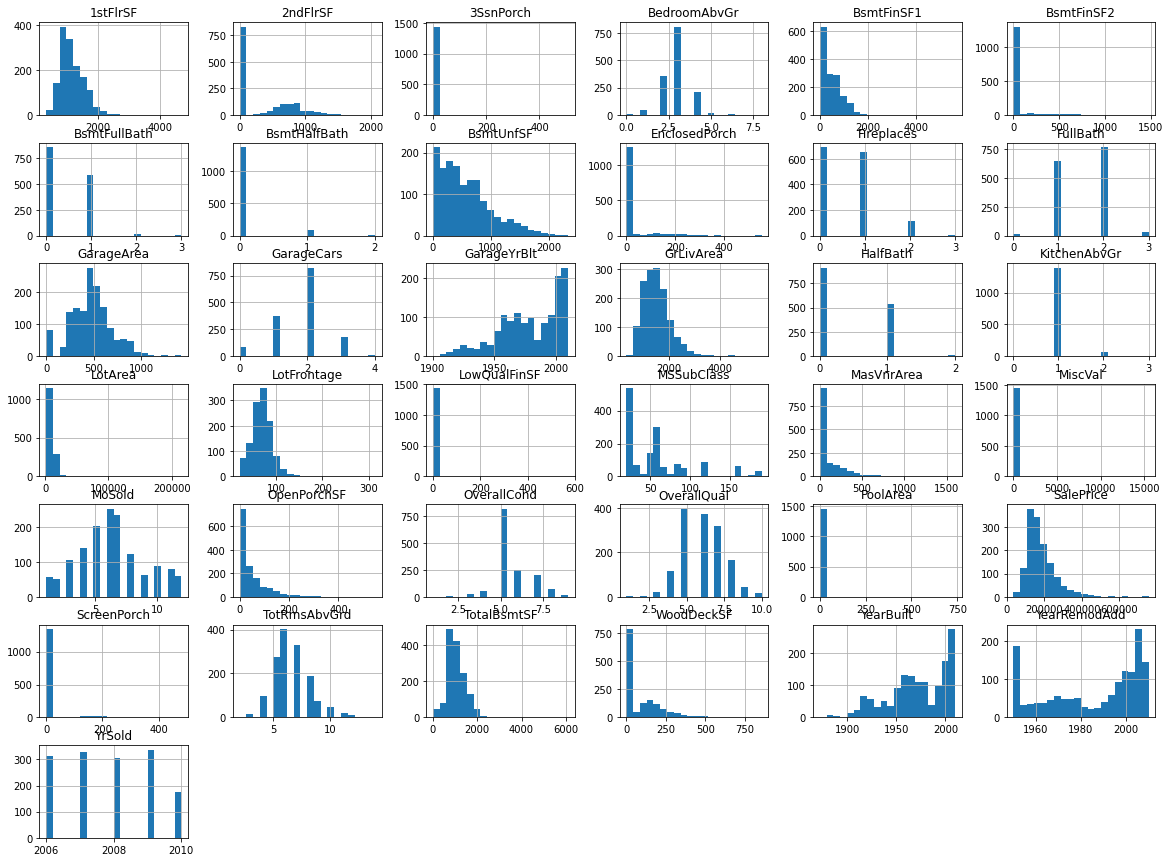

In [91]:
df.hist(bins=20, figsize=(20,15))
plt.show()

*Understand what data is missing and decide on strategy*

In [92]:
df_empty = df.columns[df.isnull().any()]

In [93]:
df_empty = df[df_empty]

In [94]:
df_empty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [95]:
df_empty.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


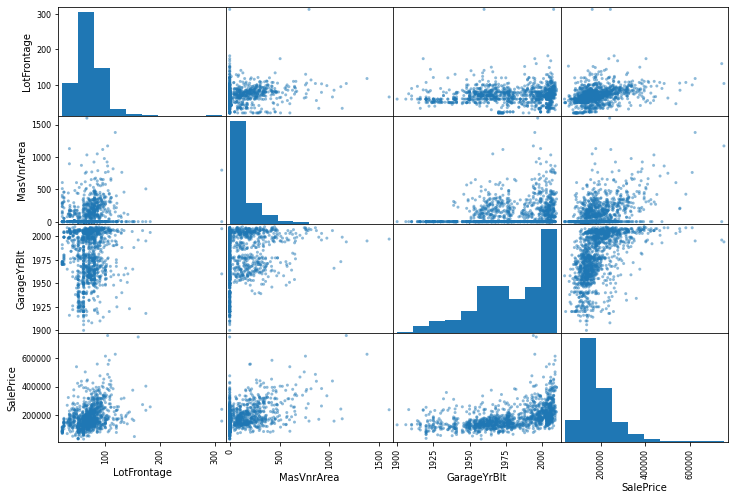

In [96]:
from pandas.plotting import scatter_matrix
df_empty = df_empty.join(df['SalePrice'])
scatter_matrix(df_empty, figsize=(12,8), diagonal='hist')
plt.show()

In [97]:
#missing values strategy
#na means absence of option in house - custom transformer
na_cat = ['Alley', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

#for numerical empty values strategy=Median
median =['LotFrontage']

#for numerical empty values strategy=Constant
#GaragYrBlt, use oldest year = 1900 to enable adding feature - age of garage - no garage means zero age
constant = ['GarageYrBlt'] 

#for numerical and catetgorical variables stratege =most frequent
frequent_cat = ['MasVnrType','Electrical']
frequent_num = ['MasVnrArea']

#check all missing features are addressed
empty_cat_columns = na_cat + frequent_cat
all_missing_feat = empty_cat_columns + median + constant + frequent_num
len(all_missing_feat) == len(df_empty.columns) -1

True

In [98]:
#fill in empty data to facilitate data evaluation
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

df_fillempty = ColumnTransformer([('median', SimpleImputer(strategy='median'), median),
                                        ('constant', SimpleImputer(strategy='constant', fill_value=1900), constant),
                                        ('frequent', SimpleImputer(strategy='most_frequent'), frequent_num),
                                        ('na', SimpleImputer(strategy='constant', fill_value='na'),na_cat),
                                        ('cat_frequent', SimpleImputer(strategy='most_frequent'), frequent_cat)], 
                                       remainder='passthrough')

In [99]:
df_fill = df_fillempty.fit_transform(df)

In [100]:
fill_columns = ['LotFrontage','GarageYrBlt','MasVnrArea','Alley', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','MasVnrType','Electrical']
column_list = list(df.columns)
passthrough_columns = [i for i in column_list if i not in fill_columns]
df_fill_columns = fill_columns + passthrough_columns

In [101]:
df_fill = pd.DataFrame(df_fill, columns=df_fill_columns)
df_fill.index = df.index
df_fill = df_fill.apply(pd.to_numeric, errors='ignore')
df_fill.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   GarageYrBlt    1460 non-null   float64
 2   MasVnrArea     1460 non-null   float64
 3   Alley          1460 non-null   object 
 4   BsmtQual       1460 non-null   object 
 5   BsmtCond       1460 non-null   object 
 6   BsmtExposure   1460 non-null   object 
 7   BsmtFinType1   1460 non-null   object 
 8   BsmtFinType2   1460 non-null   object 
 9   FireplaceQu    1460 non-null   object 
 10  GarageType     1460 non-null   object 
 11  GarageFinish   1460 non-null   object 
 12  GarageQual     1460 non-null   object 
 13  GarageCond     1460 non-null   object 
 14  PoolQC         1460 non-null   object 
 15  Fence          1460 non-null   object 
 16  MiscFeature    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  Electric

##Data Exploration

###Num Variables

Correlations

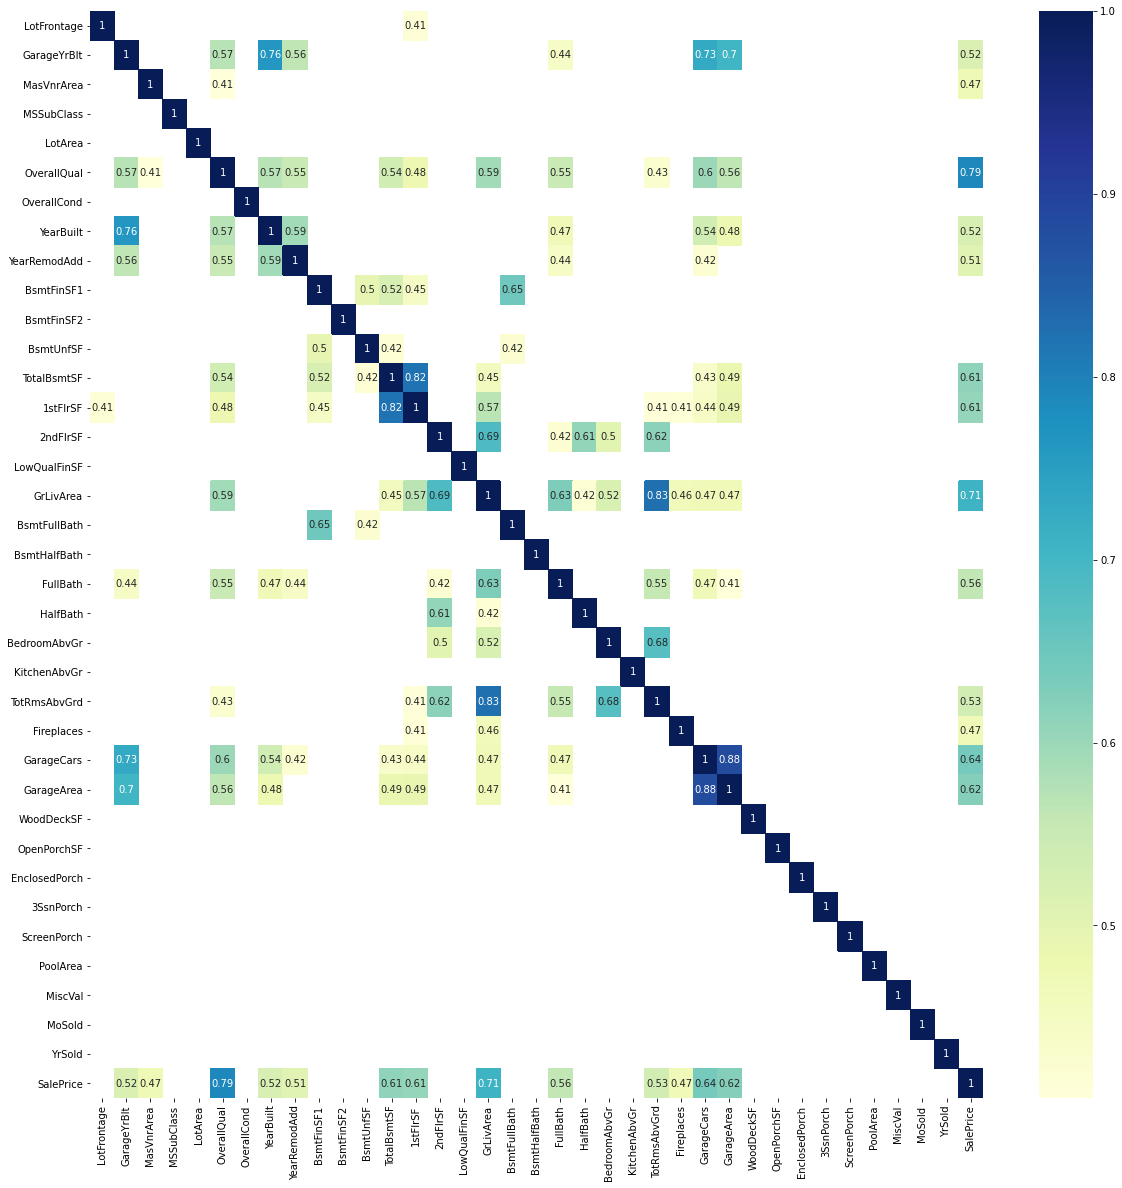

In [102]:
import seaborn as sns
plt.figure(figsize=(20,20))
corr_matrix=df_fill.corr().abs()
sns.heatmap(corr_matrix[corr_matrix>=0.4], cmap='YlGnBu' , annot=True)

In [103]:
#observations

#New features to test out
#SF related features> combine to form 'total_sf' and remove the consitutents - 'TotalBsmtSF','GrLivArea', other SF related features make up these two vairables hence remove
#combine bathrooms = from one feature and check for relationship - 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
#check whether breaking out other rooms from TotRmsAbvGrd will improve 'TotRmsAbvGrd' , 'BedroomAbvGr'
#combine out door areas to form outdoorSF by combining 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch','WoodDeckSF'

#garagecars and garagearea same thing, dropping garagearea and garagecars tad bid more related to salesprice

#yearremodeled and yearbuilt are same data, removed yearbuild and remove garageyearbuilt as related to prior, not meaningfully related to sale price

#garageyrbuilt drop due to correlation with yearremodelled

#MSSubClass is an object

#Other variable based on description and muilticolinearity will drop, will focus only on num variables with strong correlation as well as fundemental relationship with saleprice

num_features_drop = ['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageCars','GarageYrBlt', 'YearBuilt','OverallCond',
                     'LowQualFinSF','PoolArea','MiscVal','MoSold','YrSold','KitchenAbvGr']
                
num_to_object =['MSSubClass']

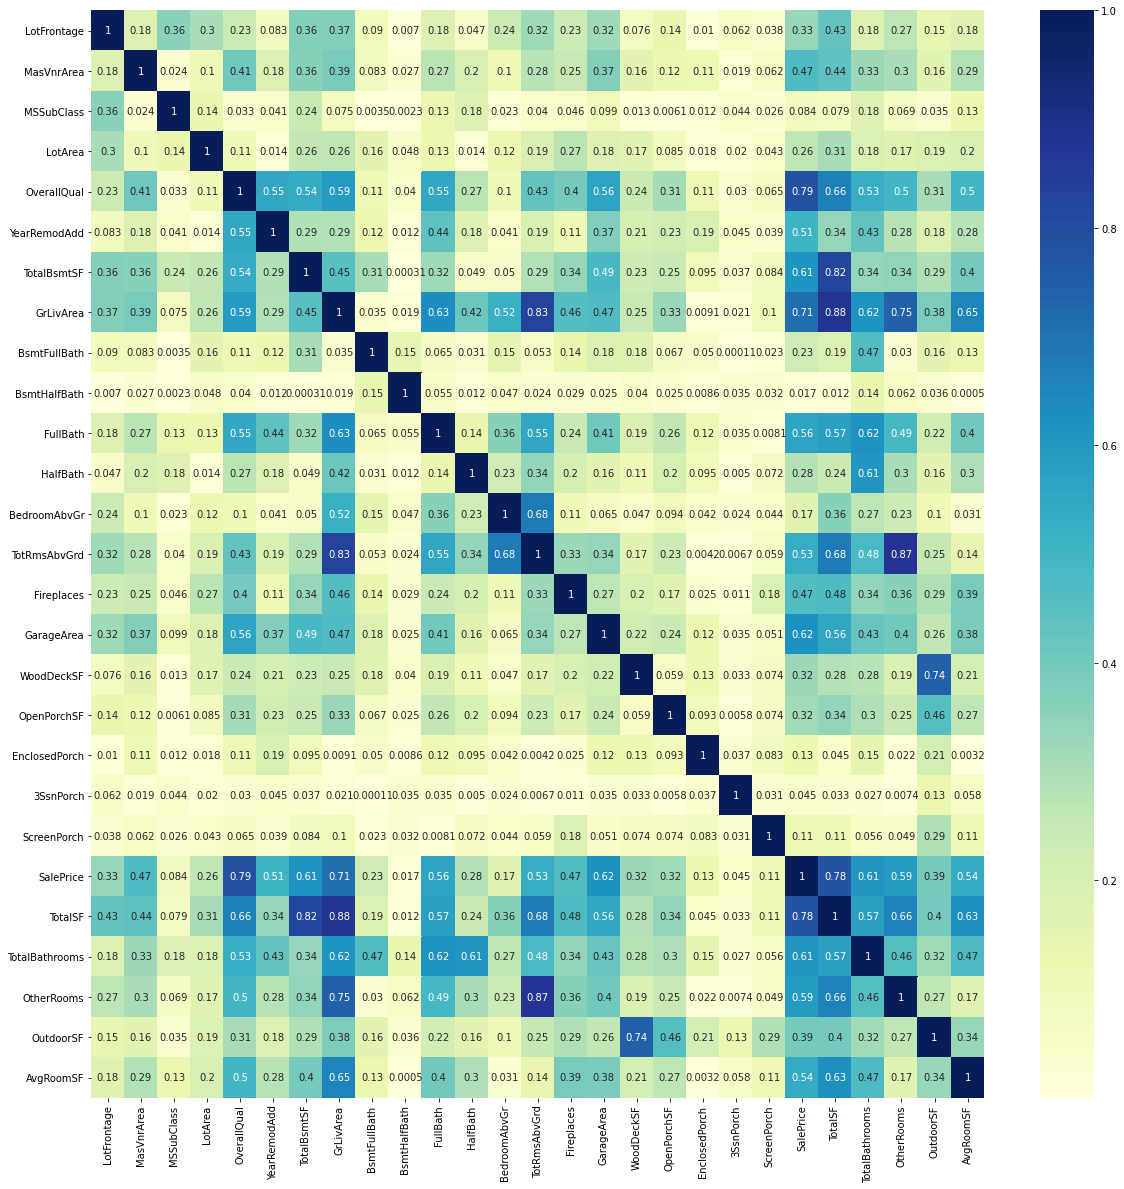

In [104]:
#experiment with new features
df_cleannum = df_fill.drop(num_features_drop, axis=1)
df_cleannum['TotalSF'] = df_cleannum[['TotalBsmtSF','GrLivArea']].sum(axis=1)
df_cleannum['TotalBathrooms'] = df_cleannum[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].sum(axis=1)
df_cleannum['OtherRooms'] = df_cleannum['TotRmsAbvGrd'] - df_cleannum['BedroomAbvGr']
df_cleannum['OutdoorSF'] = df_cleannum[['OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch','WoodDeckSF']].sum(axis=1)
df_cleannum['AvgRoomSF'] = df_cleannum['GrLivArea'] / df_cleannum['TotRmsAbvGrd']
corr_matrix = df_cleannum.corr().abs()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

Oultlier Detection

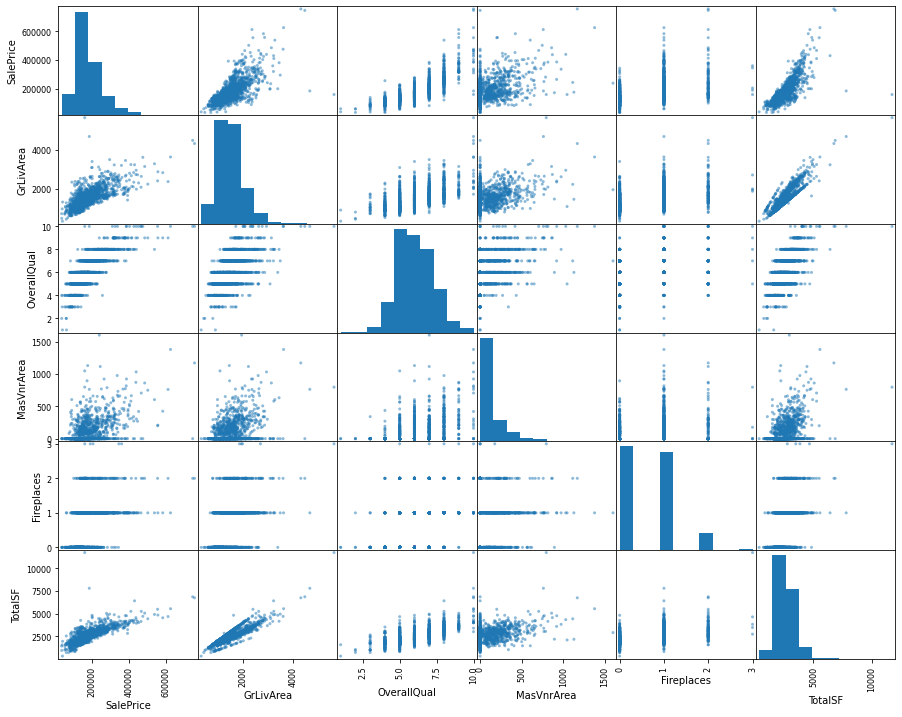

In [105]:
#run scatter plot with a few features highly correlated with SalePrice
from pandas.plotting import scatter_matrix
df_scatter = df_cleannum[['SalePrice','GrLivArea','OverallQual','MasVnrArea','Fireplaces', 'TotalSF']]
scatter_matrix(df_scatter,figsize=(15,12))
plt.show()

In [106]:
#two data points seem to be clear outliers when looking SalePrice vs both GrLivArea and OverallQaul
#filter dataset based on GRLivArea > 4000

df_cleannum[df_cleannum.SalePrice>700000]

,LotFrontage,MasVnrArea,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,MasVnrType,Electrical,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SaleType,SaleCondition,SalePrice,TotalSF,TotalBathrooms,OtherRooms,OutdoorSF,AvgRoomSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
692,104.0,1170.0,na,Ex,TA,Gd,GLQ,Unf,Ex,Attchd,Fin,TA,TA,na,na,na,BrkFace,SBrkr,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,1995,Gable,WdShngl,HdBoard,HdBoard,Ex,TA,PConc,2444,GasA,Ex,Y,4316,0,1,3,1,4,Ex,10,Typ,2,832,Y,382,50,0,0,0,WD,Normal,755000,6760,5,6,432,431.6
1183,160.0,0.0,na,Ex,TA,Av,GLQ,Unf,TA,Attchd,Fin,TA,TA,Ex,MnPrv,na,None,SBrkr,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,1996,Hip,CompShg,Wd Sdng,ImStucc,Gd,TA,PConc,2396,GasA,Ex,Y,4476,1,0,3,1,4,Ex,10,Typ,2,813,Y,171,78,0,0,0,WD,Abnorml,745000,6872,5,6,249,447.6


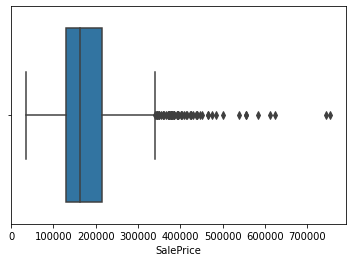

In [107]:
df_cleannum[df_fill.SalePrice>600000]
sns.boxplot(x='SalePrice', data=df_cleannum )

In [108]:
df_cleannum[df_cleannum.TotalSF>7000]

,LotFrontage,MasVnrArea,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,MasVnrType,Electrical,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SaleType,SaleCondition,SalePrice,TotalSF,TotalBathrooms,OtherRooms,OutdoorSF,AvgRoomSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,130.0,762.0,na,Ex,TA,Gd,GLQ,Unf,Gd,BuiltIn,Fin,TA,TA,na,na,na,Stone,SBrkr,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,2008,Hip,CompShg,CemntBd,CmentBd,Ex,TA,PConc,3138,GasA,Ex,Y,4676,1,0,3,1,3,Ex,11,Typ,1,884,Y,208,406,0,0,0,New,Partial,184750,7814,5,8,614,425.090909
1299,313.0,796.0,na,Ex,TA,Gd,GLQ,Unf,Gd,Attchd,Fin,TA,TA,Gd,na,na,Stone,SBrkr,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,2008,Hip,ClyTile,Stucco,Stucco,Ex,TA,PConc,6110,GasA,Ex,Y,5642,2,0,2,1,3,Ex,12,Typ,3,1418,Y,214,292,0,0,0,New,Partial,160000,11752,5,9,506,470.166667


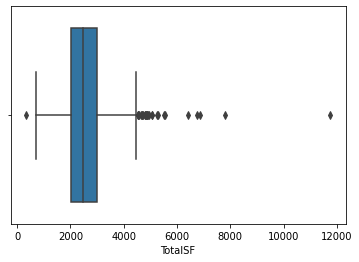

In [109]:
sns.boxplot(x='TotalSF', data=df_cleannum)

In [110]:
#keeping SalePrice outliers as seems justified based on features, rerun after removing to see whether there will be an improvement
#data items to drop
outliers= [524, 1299]
df_cleannum.drop([524, 1299], inplace=True)

Checking for skewness

In [111]:
df_cleannum.skew(axis=0)

LotFrontage        1.720857
MasVnrArea         2.696329
MSSubClass         1.407011
LotArea           12.573925
OverallQual        0.200786
YearRemodAdd      -0.501838
TotalBsmtSF        0.511703
GrLivArea          1.010992
BsmtFullBath       0.590358
BsmtHalfBath       4.100114
FullBath           0.031271
HalfBath           0.680051
BedroomAbvGr       0.212325
TotRmsAbvGrd       0.660502
Fireplaces         0.632060
GarageArea         0.131748
WoodDeckSF         1.545805
OpenPorchSF        2.339829
EnclosedPorch      3.087164
3SsnPorch         10.297106
ScreenPorch        4.118929
SalePrice          1.881296
TotalSF            0.817081
TotalBathrooms     0.257400
OtherRooms         0.848178
OutdoorSF          1.104405
AvgRoomSF          0.709390
dtype: float64

###Categorical Variables

In [112]:
df_cleannum['MSSubClass'] = df_cleannum['MSSubClass'].astype(object)
cat_column_list = df_cleannum.select_dtypes('object').columns

In [113]:
cat_column_list

Index(['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'MasVnrType', 'Electrical', 'MSSubClass', 'MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [114]:
#determinie categorical encoding strategy 

#dropiing the following;

cat_features_drop = ['RoofStyle', 'ExterQual', 'BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual',
         'PoolQC','Fence','MiscFeature','SaleCondition','Exterior1st','Exterior2nd','MSSubClass']

#ordinal encoding
ordinal = ['Neighborhood','BldgType','HouseStyle','ExterCond',
           'BsmtQual','HeatingQC','CentralAir','FireplaceQu','GarageCond','PavedDrive']

#onehot encoding
one_hot = ['Foundation','BsmtCond','Heating','Electrical', 'RoofMatl','Functional','SaleType','MSZoning','Utilities','KitchenQual','MasVnrType',
           'Street', 'Alley','LandSlope', 'LandContour','Condition1', 'Condition2','LotShape', 'LotConfig']

#categoris to combine & onehot encode
Combine_cat = ['Street', 'Alley','LandSlope', 'LandContour','Condition1', 'Condition2','LotShape', 'LotConfig']
Access = ['Street', 'Alley']
LandChar = ['LandSlope', 'LandContour']
Proximitty = ['Condition1', 'Condition2']
LandProfile = ['LotShape', 'LotConfig']


len(cat_column_list) - len(ordinal + one_hot + cat_features_drop)

0

TA    735
Gd    586
Ex     98
Fa     39
Name: KitchenQual, dtype: int64

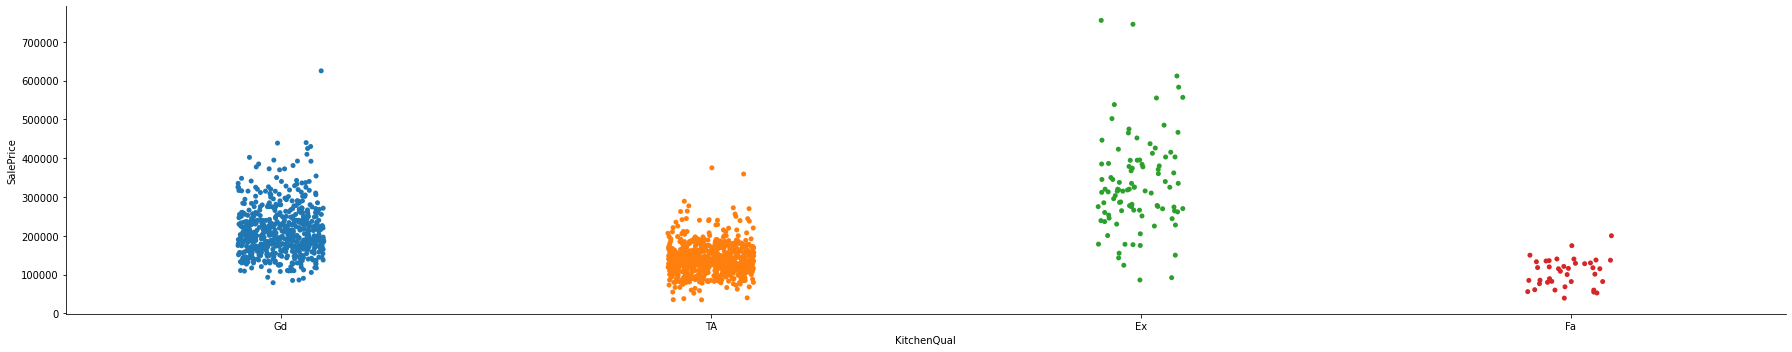

In [115]:
sns.catplot(x='KitchenQual', y='SalePrice', data=df_cleannum, height=5, aspect=5)
df_cleannum['KitchenQual'].value_counts()

In [116]:
df_test = df_cleannum.copy()

In [117]:
df_test['Access'] = df_test[['Street', 'Alley']].agg('_'.join, axis=1)
df_test['LandChar'] = df_test[['LandSlope', 'LandContour']].agg('_'.join, axis=1)
df_test['Proximitty'] = df_test[['Condition1', 'Condition2']].agg('_'.join, axis=1)
df_test['LandProfile'] = df_test[['LotShape', 'LotConfig']].agg('_'.join, axis=1)

Pave_na      1361
Pave_Grvl      50
Pave_Pave      41
Grvl_na         6
Name: Access, dtype: int64

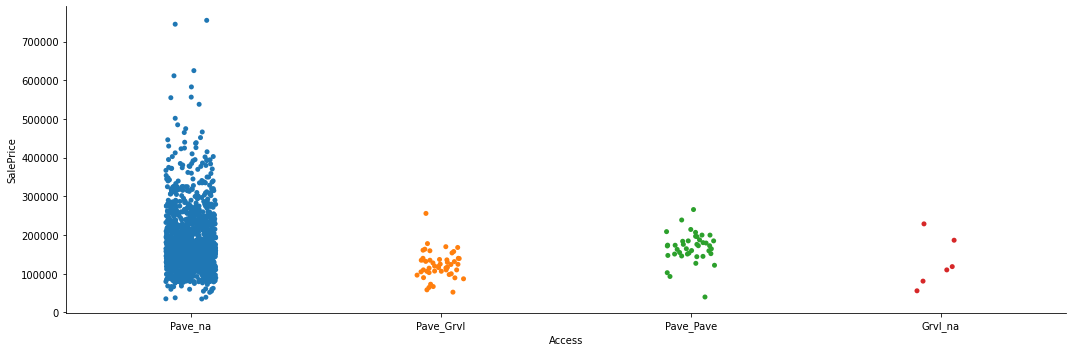

In [118]:
sns.catplot(x='Access', y='SalePrice', data=df_test, height=5, aspect=3)
df_test['Access'].value_counts()

Gtl_Lvl    1294
Gtl_Bnk      45
Gtl_HLS      32
Mod_Low      18
Mod_Lvl      16
Mod_HLS      16
Mod_Bnk      15
Sev_Low       9
Gtl_Low       9
Sev_HLS       2
Sev_Bnk       1
Sev_Lvl       1
Name: LandChar, dtype: int64

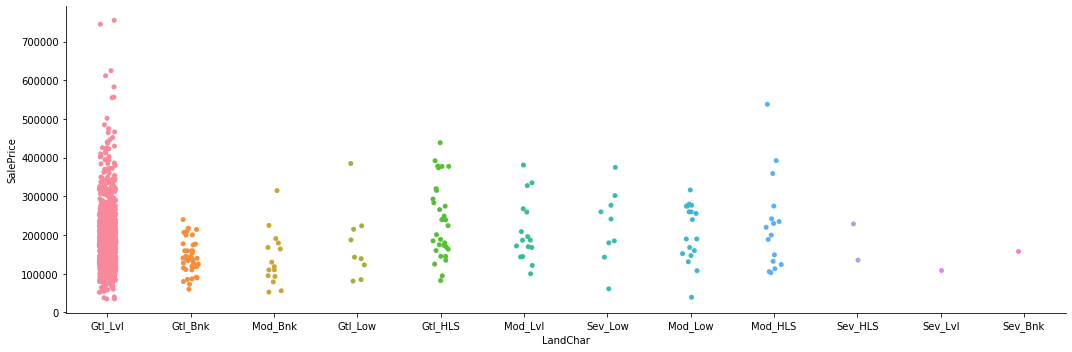

In [119]:
sns.catplot(x='LandChar', y='SalePrice', data=df_test, height=5, aspect=3)
df_test['LandChar'].value_counts()

Norm_Norm        1260
Feedr_Norm         75
Artery_Norm        45
RRAn_Norm          22
PosN_Norm          17
RRAe_Norm          11
PosA_Norm           8
RRNn_Norm           4
RRAn_Feedr          4
Feedr_RRNn          2
Artery_Artery       2
RRNe_Norm           2
Feedr_RRAn          1
RRNn_Feedr          1
PosN_PosN           1
Feedr_RRAe          1
Feedr_Feedr         1
Artery_PosA         1
Name: Proximitty, dtype: int64

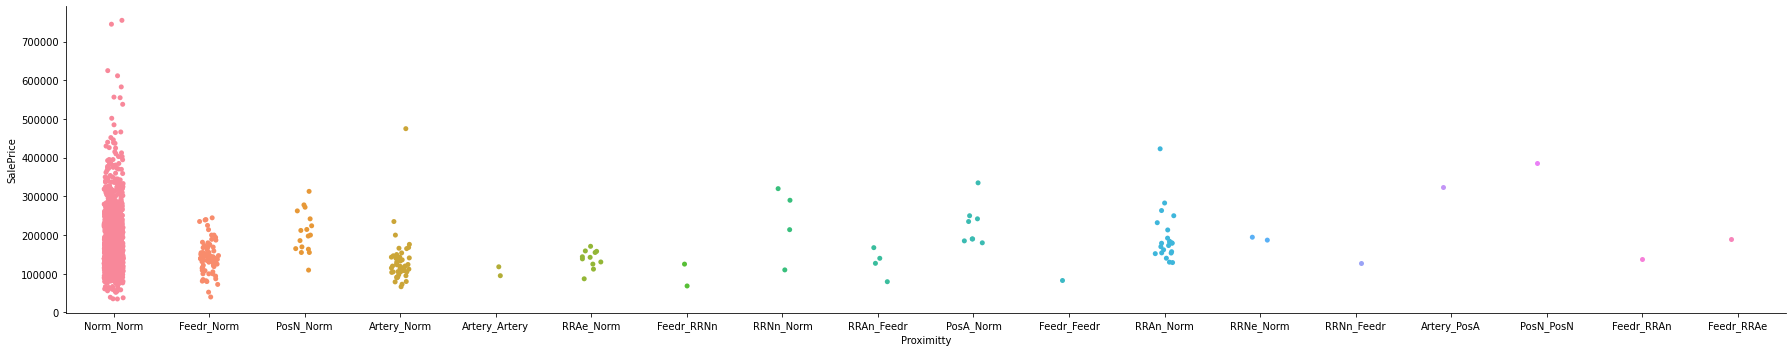

In [120]:
sns.catplot(x='Proximitty', y='SalePrice', data=df_test, height=5, aspect=5)
df_test['Proximitty'].value_counts()

Reg_Inside     748
IR1_Inside     283
Reg_Corner     146
IR1_Corner     107
IR1_CulDSac     77
Reg_FR2         27
IR1_FR2         15
IR2_Inside      14
IR2_CulDSac     14
IR2_Corner       8
IR3_Inside       6
IR2_FR2          5
Reg_FR3          3
IR3_CulDSac      2
IR3_Corner       1
Reg_CulDSac      1
IR1_FR3          1
Name: LandProfile, dtype: int64

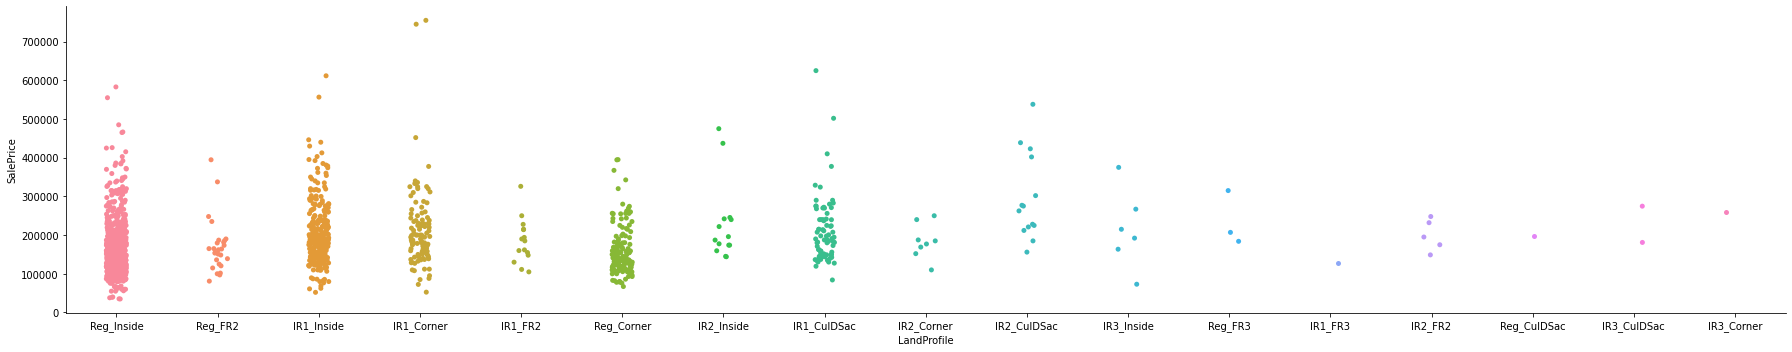

In [121]:
sns.catplot(x='LandProfile', y='SalePrice', data=df_test, height=5, aspect=5)
df_test['LandProfile'].value_counts()

##Data Preparation

Defining X & y

In [122]:
df.drop(outliers, inplace=True)

In [123]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice'].copy()

In [124]:
X.shape

(1458, 79)

Num and Cat feature list

In [125]:
X[num_to_object] = X[num_to_object].astype('object')

In [126]:
#get num and categorical columns lists
num_feature_list = list(X.select_dtypes('number').columns)
cat_feature_list = list(set(X.columns)-set(num_feature_list))

In [127]:
#remove the columns to drop
num_feature_list = list(set(num_feature_list) - set(num_features_drop))
cat_feature_list = list(set(cat_feature_list) - set(cat_features_drop))

Train and test set split

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Organization

*Categorical Features*

In [129]:
ordinal_na = [cat for cat in na_cat if cat in ordinal]
ordinal_balance = list(set(ordinal) - set(ordinal_na))
onehot_na = [cat for cat in na_cat if cat in one_hot and Combine_cat]
onehot_frequent = [cat for cat in frequent_cat if cat in one_hot and Combine_cat]
onehot_balance = list(set(one_hot) - set(onehot_na + onehot_frequent))
one_hot_all = onehot_na + onehot_frequent + onehot_balance
len(cat_feature_list) == len(ordinal_na + ordinal_balance + onehot_na + onehot_frequent + onehot_balance)

True

*Numerical Features*

In [130]:
num_frequant = [num for num in frequent_num if num in num_feature_list]
num_constant = [num for num in constant if num in num_feature_list]
num_median = list(set(num_feature_list) - set(num_frequant + num_constant))

#setup pipeline with processing as per this sequence of features
num_feature_list = num_frequant + num_constant + num_median

Creating custom transformers

In [131]:
#custom feature selector
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFeatureSelector(BaseEstimator, TransformerMixin):
  def __init__(self, feature_names):
    self._feature_names=feature_names

  def fit(self, X, y=None):
    return self
  
  def transform(self, X, y=None):
    return X[self._feature_names]

In [156]:
#setup custom feature addition - num features

TotalBsmtSF_ix= X_train[num_feature_list].columns.get_loc('TotalBsmtSF')
GrLivArea_ix= X_train[num_feature_list].columns.get_loc('GrLivArea')
BsmtFullBath_ix= X_train[num_feature_list].columns.get_loc('BsmtFullBath')
BsmtHalfBath_ix= X_train[num_feature_list].columns.get_loc('BsmtHalfBath')
Fullbath_ix= X_train[num_feature_list].columns.get_loc('FullBath')
Halfbath_ix= X_train[num_feature_list].columns.get_loc('HalfBath')
BedroomAbvGr_ix = X_train[num_feature_list].columns.get_loc('BedroomAbvGr')
TotRmsAbvGrd_ix = X_train[num_feature_list].columns.get_loc('TotRmsAbvGrd')
OpenPorchSF_ix = X_train[num_feature_list].columns.get_loc('OpenPorchSF')
EnclosedPorch_ix = X_train[num_feature_list].columns.get_loc('EnclosedPorch')
SsnPorch_ix = X_train[num_feature_list].columns.get_loc('3SsnPorch')
ScreenPorch_ix = X_train[num_feature_list].columns.get_loc('ScreenPorch')
WoodDeckSF_ix = X_train[num_feature_list].columns.get_loc('WoodDeckSF')


class CustomFeatureAdditionNum(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    totalSF = X[:, TotalBsmtSF_ix] + X[:,GrLivArea_ix]
    totalbaths = X[:, BsmtFullBath_ix] + X[:, BsmtHalfBath_ix] + X[:, Fullbath_ix] + X[:,Halfbath_ix]
    otherrooms = X[:, TotRmsAbvGrd_ix] - X[:, BedroomAbvGr_ix]
    outdoorSF = X[: , OpenPorchSF_ix] + X[: , EnclosedPorch_ix] + X[: , SsnPorch_ix] + X[: , ScreenPorch_ix] + X[: , WoodDeckSF_ix]
    avgroomSF = X[: ,GrLivArea_ix] / X[:, TotRmsAbvGrd_ix]
    X=np.delete(X, [TotalBsmtSF_ix, GrLivArea_ix, BsmtFullBath_ix, BsmtHalfBath_ix, Fullbath_ix, Halfbath_ix, TotRmsAbvGrd_ix, OpenPorchSF_ix,
                    EnclosedPorch_ix, SsnPorch_ix, ScreenPorch_ix, WoodDeckSF_ix] , axis=1)
    return np.c_[X, totalSF, totalbaths, otherrooms, outdoorSF, avgroomSF]

#correcting skewness

class LogTransform(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    X_log = np.log1p(X)
    return X_log

In [133]:
#setup custom feature addition - cat features
Access = ['Street', 'Alley']
LandChar = ['LandSlope', 'LandContour']
Proximitty = ['Condition1', 'Condition2']
LandProfile = ['LotShape', 'LotConfig']

Street_ix = X_train[one_hot_all].columns.get_loc('Street')
Alley_ix = X_train[one_hot_all].columns.get_loc('Alley')
LandSlope_ix = X_train[one_hot_all].columns.get_loc('LandSlope')
LandContour_ix = X_train[one_hot_all].columns.get_loc('LandContour')
Condition1_ix = X_train[one_hot_all].columns.get_loc('Condition1')
Condition2_ix = X_train[one_hot_all].columns.get_loc('Condition2')
LotShape_ix = X_train[one_hot_all].columns.get_loc('LotShape')
LotConfig_ix = X_train[one_hot_all].columns.get_loc('LotConfig')



class CustomFeatureAdditionCat(BaseEstimator,TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    street = X[:, Street_ix].astype('str')
    alley = X[:, Alley_ix].astype('str')
    slope = X[:, LandSlope_ix].astype('str')
    contour = X[:, LandContour_ix].astype('str')
    condition1 = X[:, Condition1_ix].astype('str')
    condition2 = X[:, Condition2_ix].astype('str')
    lotshape = X[:, LotShape_ix].astype('str')
    lotconfig = X[:, LotConfig_ix].astype('str')
    LandChar = np.char.add(slope, contour)
    Access = np.char.add(street, alley)
    Proximity = np.char.add(condition1, condition2)
    LandProfile = np.char.add(lotshape, lotconfig)
    X = np.delete(X, [Street_ix, Alley_ix, LandSlope_ix, LandContour_ix, Condition1_ix, Condition2_ix, LotShape_ix, LotConfig_ix], axis=1)
    return np.c_[X, LandChar, Access, Proximity, LandProfile]

Setting up pipelines

In [134]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [371]:
#onehot_columntransformer
onehot_transformer = ColumnTransformer([('constant_onehot', SimpleImputer(strategy ='constant', fill_value='na'),onehot_na),
                                        ('frequent_onehot', SimpleImputer(strategy='most_frequent'), onehot_frequent),
                                        ('balance_onehot', SimpleImputer(strategy='most_frequent'), onehot_balance)],
                                       remainder='passthrough')
                                     
#cat pipelines
ordinal_pipeline = Pipeline([('catordinal_column_selection', CustomFeatureSelector(ordinal)),
                             ('fill_NanOrdConstant', SimpleImputer(strategy='constant', fill_value='na')),
                             ('ordinal_encode', OrdinalEncoder()),
                             ('std_cat', StandardScaler())])

onehot_pipeline = Pipeline([('catonehot_column_selection', CustomFeatureSelector(one_hot_all)),
                            ('onehot_transformer', onehot_transformer),
                            ('catcustom_feature', CustomFeatureAdditionCat()),
                            ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'))])

#num transformer
num_transformer = ColumnTransformer([('frequent_impute', SimpleImputer(strategy='most_frequent'), num_frequant),
                            ('constant_num', SimpleImputer(strategy='constant', fill_value=1900), num_constant),
                            ('median_num', SimpleImputer(strategy='median'), num_median)])

#num pipeline
num_pipeline = Pipeline([('num_column_selection', CustomFeatureSelector(num_feature_list)),
                        ('num_tranformer', num_transformer),
                        ('custom_features', CustomFeatureAdditionNum()),
                        # ('log_transform', LogTransform()),
                        ('std_num', StandardScaler())])

#combining pipeline
pre_process = FeatureUnion([('ordinal_pipeline', ordinal_pipeline),
                            ('onehot_pipeline', onehot_pipeline),
                            ('num_pipeline', num_pipeline)])

Pre_processing the Training and Test Set

In [372]:
#fitting to full training - missing categorical vairable, can't initiate 'ignore' as dropping first columsn in onehot encoding to avoid multicolenearity
X_prepared_train = pre_process.fit_transform(X_train)
X_prepared_test = pre_process.transform(X_test)

# Checking to ensure shapes of processed train and test set is equal due to uneven spread of cat data between test and training set
print(X_prepared_train.shape[1] == X_prepared_test.shape[1])

#log_transform y(SalePrice)
y_train_log = np.log1p(y_train)

True


MODEL BUILDING AND TESTING

In [218]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error
np.set_printoptions(precision=3)

In [219]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [286]:
def rmse_model(y_train, y_pred):
  mse = mean_squared_error(y_train, y_pred)
  rmse = np.sqrt(mse)
  return rmse

In [233]:
def crossvalscores(model, X, y, cv):
  scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',cv=cv)
  # scores = np.expm1(scores)
  scores = np.sqrt(-scores)
  print('Scores : ', scores)
  print('Mean : ', scores.mean())
  print('StdD : ', scores.std())

In [234]:
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

ElasticNet

In [373]:
from sklearn.linear_model import ElasticNet
enet_reg = ElasticNet(l1_ratio=0.5)
enet_reg.fit(X_prepared_train, y_train_log)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [374]:
y_pred = np.expm1(enet_reg.predict(X_prepared_train))

In [375]:
rmse_model(y_train, y_pred)

79539.23872333328

In [376]:
crossvalscores(enet_reg, X_prepared_train, y_train, 20)

Scores :  [33560.96 25618.21 38003.52 28262.92 24568.16 37944.24 22095.92 24896.98
 24951.46 33361.18 27011.38 26153.35 66718.96 26738.94 24167.64 25237.27
 26708.70 25423.54 26268.68 37981.82]
Mean :  30283.69068149025
StdD :  9654.05284319926


SVR

In [377]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_prepared_train, y_train_log)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [378]:
y_pred= svr_reg.predict(X_prepared_train)
# y_pred= np.expm1(y_pred)

In [379]:
rmse_model(y_train_log, y_pred)

0.08332317136720378

In [380]:
crossvalscores(svr_reg, X_prepared_train, y_train_log, 10)

Scores :  [0.15 0.15 0.18 0.13 0.17 0.12 0.19 0.14 0.12 0.11]
Mean :  0.1459723516746307
StdD :  0.025426260500165544


Decision Tree Model

In [381]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=8)

In [382]:
tree_reg.fit(X_prepared_train, y_train_log)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [383]:
tree_rmse = np.sqrt(mean_squared_error(y_train_log, tree_reg.predict(X_prepared_train)))
tree_rmse

0.08053322497367031

In [384]:
crossvalscores(tree_reg, X_prepared_train, y_train_log, 10)

Scores :  [0.18 0.20 0.20 0.20 0.22 0.17 0.21 0.21 0.17 0.19]
Mean :  0.1962499501303165
StdD :  0.015909680514782493


Random Forests

In [385]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [386]:
forest_reg.fit(X_prepared_train, y_train_log)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [387]:
y_pred = forest_reg.predict(X_prepared_train)

In [388]:
rmse_model(y_train_log, y_pred)

0.052659718853686845

In [389]:
crossvalscores(forest_reg, X_prepared_train, y_train_log, 10)

Scores :  [0.13 0.16 0.17 0.13 0.17 0.13 0.16 0.14 0.12 0.13]
Mean :  0.1445749352633453
StdD :  0.019005163317352632


XG Boost

In [390]:
from xgboost import XGBRFRegressor
xgb_reg = XGBRFRegressor()

In [391]:
xgb_reg.fit(X_prepared_train, y_train_log)

[11:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [392]:
y_pred = xgb_reg.predict(X_prepared_train)

In [393]:
rmse_model(y_train_log, y_pred)

0.3965384532225317

In [394]:
crossvalscores(xgb_reg, X_prepared_train, y_train_log, 10)

[11:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GradientBoosRegressor

In [395]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_reg = GradientBoostingRegressor(random_state=0)

In [396]:
gbr_reg.fit(X_prepared_train, y_train_log)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [397]:
y_pred = gbr_reg.predict(X_prepared_train)

In [398]:
rmse_model(y_train_log, y_pred)

0.08997913448361179

In [399]:
crossvalscores(gbr_reg, X_prepared_train, y_train_log, 10)

Scores :  [0.13 0.15 0.15 0.11 0.17 0.11 0.15 0.14 0.10 0.12]
Mean :  0.1329374626737114
StdD :  0.019864711932922826


In [400]:
y_pred = np.expm1(y_pred)
rmse_model(y_train, y_pred)

16624.232248732205

In [401]:
y_test_pred = gbr_reg.predict(X_prepared_test)

In [402]:
y_test_pred = np.expm1(y_test_pred)

In [403]:
rmse_model(y_test, y_test_pred)

22302.769923919834

Finetuninig - Gradient Boost

In [404]:
from sklearn.model_selection import GridSearchCV

In [405]:
param_grid = [{'n_estimators':[130,133,135], 'max_depth':[3,4,5]}]

In [406]:
grid_search = GridSearchCV(gbr_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', return_train_score=True)

In [407]:
grid_search.fit(X_prepared_train, y_train_log)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [408]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.13523919231115292 {'max_depth': 3, 'n_estimators': 130}
0.1352526950262174 {'max_depth': 3, 'n_estimators': 133}
0.13509764621987833 {'max_depth': 3, 'n_estimators': 135}
0.136710000242454 {'max_depth': 4, 'n_estimators': 130}
0.13684753805767325 {'max_depth': 4, 'n_estimators': 133}
0.13687373718017937 {'max_depth': 4, 'n_estimators': 135}
0.13933461527934776 {'max_depth': 5, 'n_estimators': 130}
0.13933425662630727 {'max_depth': 5, 'n_estimators': 133}
0.13935122402656858 {'max_depth': 5, 'n_estimators': 135}


In [409]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 135}

In [354]:
# feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
# sorted(zip(feature_importances, final_feature_list), reverse=True)

In [410]:
final_model = grid_search.best_estimator_

In [411]:
y_pred = final_model.predict(X_prepared_train)
rmse_model(y_train_log, y_pred)

0.08516529353334082

In [412]:
y_test_pred = final_model.predict(X_prepared_test)
rmse_model(y_test, np.expm1(y_test_pred))

22327.540298734362

Stacking

In [413]:
from sklearn.ensemble import StackingRegressor

In [414]:
models = [('svr', SVR()), ('gbr', GradientBoostingRegressor(max_depth=3, n_estimators=135))]
stacked_regressor = StackingRegressor(estimators=models,cv=10)

In [415]:
stacked_regressor.fit(X_prepared_train, y_train_log)

StackingRegressor(cv=10,
                  estimators=[('svr',
                               SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                   epsilon=0.1, gamma='scale', kernel='rbf',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=False)),
                              ('gbr',
                               GradientBoostingRegressor(alpha=0.9,
                                                         ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='ls', max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
              

In [416]:
y_pred = stacked_regressor.predict(X_prepared_train)

In [417]:
rmse_model(y_train_log, y_pred)

0.08035522825850945

In [418]:
y_test_pred = np.expm1(stacked_regressor.predict(X_prepared_test))
rmse_model(y_test, y_test_pred)

21915.20870527104

Predicting on the test set

In [423]:
# #read test set for final prediction
# X_testset = pd.read_csv('test.csv')
# X_testset[num_to_object] = X_testset[num_to_object].astype('object')
# X_testset.shape

# #drop redundent columns set index to ID
# # X_testset.drop(drop_list, axis=1, inplace=True)
# # X_testset.shape
# X_testset.set_index('Id', inplace=True)

# #preprocess
# X_prepared_testset = pre_process.transform(X_testset)

# #predict
# y_testset_pred = np.expm1(stacked_regressor.predict(X_prepared_testset))

# #prepare result and write to CSV
# y_testset_predreshape = np.reshape(y_testset_pred, (len(y_testset_pred),1))
# y_testset_preddf = pd.DataFrame(y_testset_predreshape, columns=['SalePrice'])
# y_testset_preddf.set_index(X_testset.index,inplace=True)
# y_testset_preddf.to_csv('test_submission.csv')